<a href="https://colab.research.google.com/github/belmont358/prueba-mini/blob/main/LAB3_SpectralAnalysisAlejitoV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 3: Análisis espectral de señales 
Prof. Hernán Felipe García Arias, PhD.

Tratamiento de Señales III

Facultad de Ingeniería

Universidad de Antioquia

2021

### Actividad de Aprendizaje

El análisis espectral de señales es una fase de vital imporancia en los sistemas de aprendizaje automático. Para ello, se deben emplear técnicas de procesamiento digital de señales, las cuales permitan extraer información relevante en el domino temporal y frecuencial.

El objetivo de esta actividad es evaluar el espectrograma de señales de voz que representen comandos básicos (arriba, abajo, izquierda, y derecha). La actividad consiste en calcular el espectrograma para cada segmento de voz y a partir de los diferentes parámetros del espectrograma (ventana, traslape, tamaño del segmento y demás), observar que características importantes pueden extraer de esta representación.

Primero importaremos nuestra unidad de Drive en la sesión de Google Colab

[Importar archivos en Colab](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166)

In [ ]:
# Cargue su unidad de Drive

from google.colab import drive
drive.mount('/content/gdrive')
#ruta relativa por cada integrante
%cd /content/gdrive/MyDrive/Semestre 2021-1/Señales lll/Audios

Mounted at /content/gdrive
/content/gdrive/MyDrive/Semestre 2021-1/Señales lll/Audios


(134144, 2) 48000


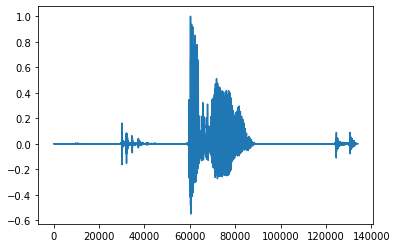

In [ ]:
# Cargue y visualice las 4 señales de voz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
# Erase output after import
from IPython.display import clear_output
clear_output()


# read speech signal from file
x, fs = sf.read('./arriba.wav')
print(x.shape,fs)

x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl

plt.figure()
plt.plot(x)


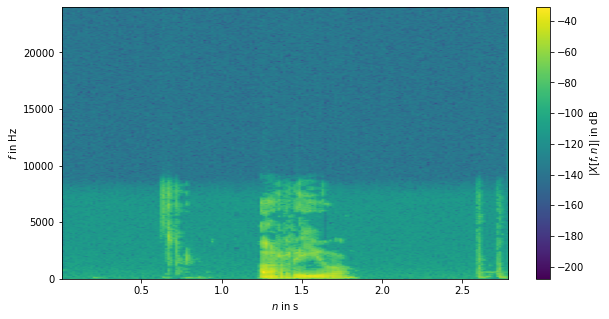

In [ ]:
L = 1024  # length of one segment
overlap = 256  # overlap between segments

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)

In [ ]:
# Cargue y visualice las 4 señales de voz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
from IPython.display import Audio
# Erase output after import
from IPython.display import clear_output
clear_output()



x, fs = sf.read('./arriba.wav')
x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
Audio(x, rate=fs)

In [ ]:
# Cargue y visualice las 4 señales de voz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
from IPython.display import Audio
# Erase output after import
from IPython.display import clear_output
clear_output()



x, fs = sf.read('./abajo.wav')
x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
Audio(x, rate=fs)

In [ ]:
# Cargue y visualice las 4 señales de voz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
from IPython.display import Audio
# Erase output after import
from IPython.display import clear_output
clear_output()



x, fs = sf.read('./derecha.wav')
x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
Audio(x, rate=fs)

In [ ]:
# Cargue y visualice las 4 señales de voz
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import soundfile as sf
from IPython.display import Audio
# Erase output after import
from IPython.display import clear_output
clear_output()



x, fs = sf.read('./izquierda.wav')
x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
Audio(x, rate=fs)

(134144, 2) 48000
(124928, 2) 48000
(141312, 2) 48000
(134144, 2) 48000


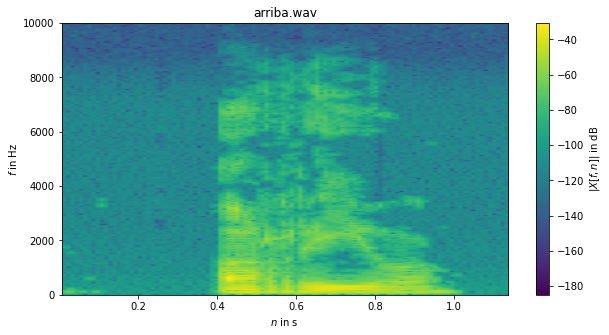

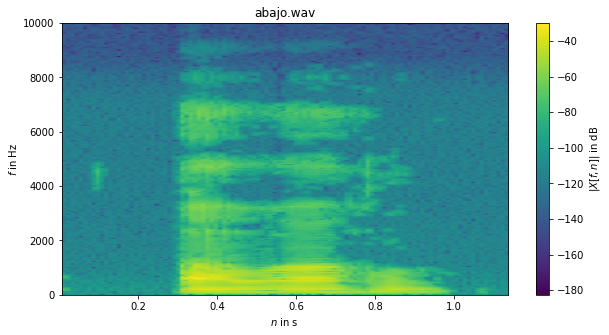

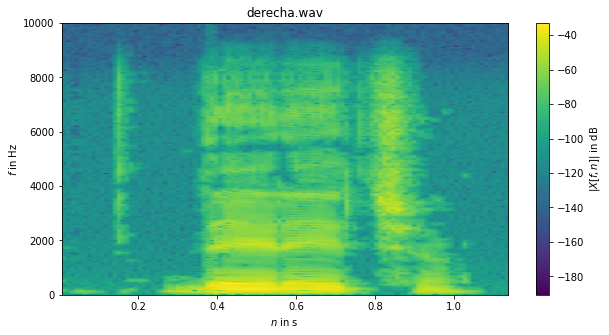

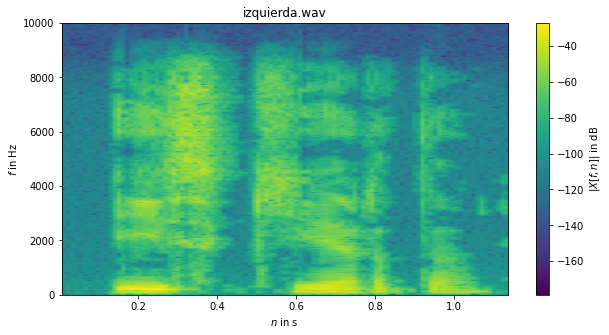

In [ ]:
# Calcule el espectrograma para cada una de las señales de voz y plotee dicha representación

clear_output()

lista = ["arriba.wav","abajo.wav", "derecha.wav", "izquierda.wav"]

for i in lista:
  # read speech signal from file
  concat = "./" + i
  x, fs = sf.read(concat)
  print(x.shape,fs)

  x = x/np.max(np.abs(x))
  xl = x[:,0]
  x = xl

  L = 1024  # length of one segment
  overlap = 512  # overlap between segments

  # compute and plot spectrogram
  plt.figure(figsize = (10, 5))
  plt.specgram(x[40000:95000], NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
  plt.xlabel(r'$n$ in s')
  plt.ylabel(r'$f$ in Hz')
  plt.title(i)
  cb = plt.colorbar()
  cb.set_label(r'$|X[f,n]|$ in dB')
  plt.autoscale(tight=True)
  plt.ylim([0,10000]);


(124928, 2) 48000
(141312, 2) 48000
(134144, 2) 48000
(134144, 2) 48000


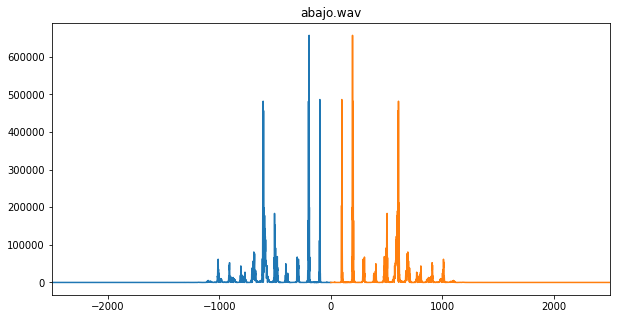

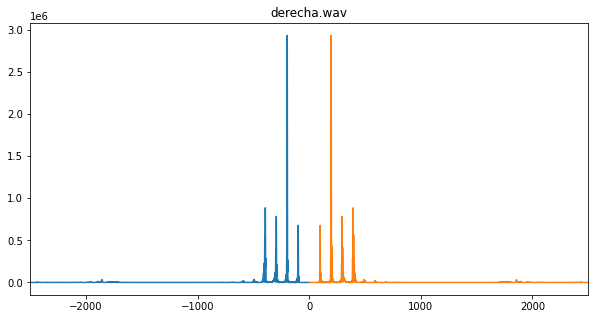

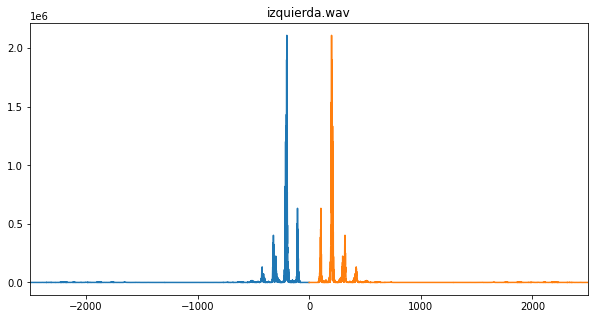

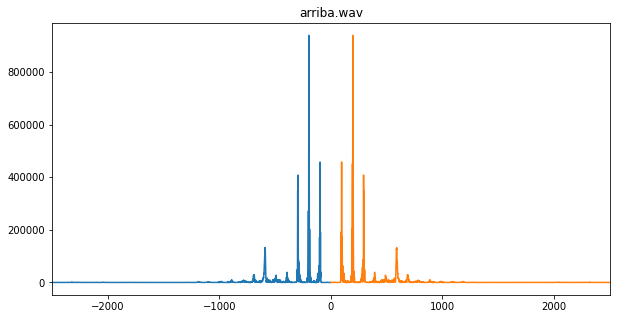

In [ ]:
#Ahora calcualremos la transformada de fourier para a continuación diseñar los filtros 
lista = ["abajo.wav", "derecha.wav", "izquierda.wav","arriba.wav"]

for i in lista:
  # read speech signal from file
  concat = "./" + i
  x, fs = sf.read(concat)
  print(x.shape,fs)

  x = x/np.max(np.abs(x))
  xl = x[:,0]
  x = xl
  X = np.fft.fft(x)

  X_pow = np.abs(X) ** 2 #la potencia
  N = len(x)

  # Plot the positive frequencies.
  f_pos = np.arange(0, fs / 2, step=fs / N)
  # Plot the negative frequencies.
  f_neg = np.arange(-fs / 2, 0, step=fs / N)
  
  
  plt.figure(figsize = (10, 5))
  plt.title(i)
  plt.xlim(-2500, 2500)
  plt.plot(f_neg, X_pow[(N // 2):]) 
  plt.plot(f_pos, X_pow[:(N // 2)])
  



# **Ahora diseñando los filtros para cada audio, pasa banda**

(134144, 2) 48000


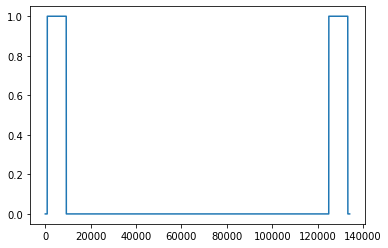

In [ ]:
#Filtro para audio de arriba
x, fs = sf.read('./arriba.wav')
print(x.shape,fs)

x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
X = np.fft.fft(x)
X_pow = np.abs(X) ** 2 #la potencia
N = len(x)

# Plot the positive frequencies.
f_pos = np.arange(0, fs / 2, step=fs / N)
# Plot the negative frequencies.
f_neg = np.arange(-fs / 2, 0, step=fs / N)

f_pos = np.arange(0, fs / 2, step=fs / N)
H_pos = 1. * (f_pos >= 300) #funcion de transferencia, donde se cumple la condicion pone true(1) y false (0), cuando no se cumple
H2_pos = 1. * (f_pos <= 3300)
Hfinal = H_pos * H2_pos

f_neg = np.arange(-fs / 2, 0, step=fs / N)
H_neg = 1. * (f_neg <= -300)
H_neg2 = 1. * (f_neg >= -3300)
Hfinal2 = H_neg * H_neg2

H = np.concatenate([Hfinal, Hfinal2]) #xfilt(w) = x(w)*h(w)
plt.plot(H)

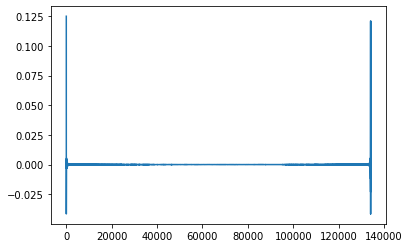

In [ ]:
h = np.real(np.fft.ifft(H)) # The IFFT should automatically be real-valued. We take np.real just to be safe.
plt.plot(h)

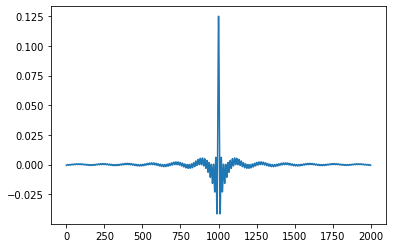

In [ ]:
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

In [ ]:
y = np.convolve(x, h_trunc) #en el tiempo hgace la convouluavion para ver elefecto del filtro a la señal

# y has an odd number of samples, so we lop off the last one.
#y = y[:-1]

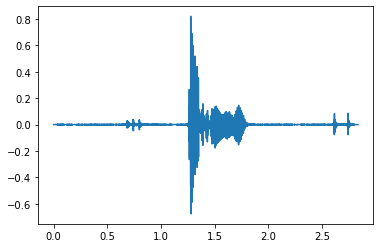

In [ ]:
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)
Audio(y, rate=fs)

(124928, 2) 48000


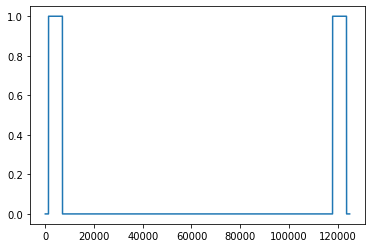

In [ ]:
#Filtro para audio de abajo
x, fs = sf.read('./abajo.wav')
print(x.shape,fs)

x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
X = np.fft.fft(x)
X_pow = np.abs(X) ** 2 #la potencia
N = len(x)

# Plot the positive frequencies.
f_pos = np.arange(0, fs / 2, step=fs / N)
# Plot the negative frequencies.
f_neg = np.arange(-fs / 2, 0, step=fs / N)

f_pos = np.arange(0, fs / 2, step=fs / N)
H_pos = 1. * (f_pos >= 500) #funcion de transferencia, donde se cumple la condicion pone true(1) y false (0), cuando no se cumple
H2_pos = 1. * (f_pos <= 2700)
Hfinal = H_pos * H2_pos

f_neg = np.arange(-fs / 2, 0, step=fs / N)
H_neg = 1. * (f_neg <= -500)
H_neg2 = 1. * (f_neg >= -2700)
Hfinal2 = H_neg * H_neg2

H = np.concatenate([Hfinal, Hfinal2]) #xfilt(w) = x(w)*h(w)
plt.plot(H)

In [ ]:
h = np.real(np.fft.ifft(H))
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

In [ ]:
y = np.convolve(x, h_trunc)
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)
Audio(y, rate=fs)

In [ ]:
#Filtro para audio de derecha
x, fs = sf.read('./derecha.wav')
print(x.shape,fs)

x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
X = np.fft.fft(x)
X_pow = np.abs(X) ** 2 #la potencia
N = len(x)

# Plot the positive frequencies.
f_pos = np.arange(0, fs / 2, step=fs / N)
# Plot the negative frequencies.
f_neg = np.arange(-fs / 2, 0, step=fs / N)

f_pos = np.arange(0, fs / 2, step=fs / N)
H_pos = 1. * (f_pos >= 500) #funcion de transferencia, donde se cumple la condicion pone true(1) y false (0), cuando no se cumple
H2_pos = 1. * (f_pos <= 4500)
Hfinal = H_pos * H2_pos

f_neg = np.arange(-fs / 2, 0, step=fs / N)
H_neg = 1. * (f_neg <= -500)
H_neg2 = 1. * (f_neg >= -4500)
Hfinal2 = H_neg * H_neg2

H = np.concatenate([Hfinal, Hfinal2]) #xfilt(w) = x(w)*h(w)
plt.plot(H)

In [ ]:
h = np.real(np.fft.ifft(H))
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

In [ ]:
y = np.convolve(x, h_trunc)
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)
Audio(y, rate=fs)

In [ ]:
#Filtro para audio de izquierda
x, fs = sf.read('./izquierda.wav')
print(x.shape,fs)

x = x/np.max(np.abs(x))
xl = x[:,0]
x = xl
X = np.fft.fft(x)
X_pow = np.abs(X) ** 2 #la potencia
N = len(x)

# Plot the positive frequencies.
f_pos = np.arange(0, fs / 2, step=fs / N)
# Plot the negative frequencies.
f_neg = np.arange(-fs / 2, 0, step=fs / N)

f_pos = np.arange(0, fs / 2, step=fs / N)
H_pos = 1. * (f_pos >= 1000) #funcion de transferencia, donde se cumple la condicion pone true(1) y false (0), cuando no se cumple
H2_pos = 1. * (f_pos <= 7000)
Hfinal = H_pos * H2_pos

f_neg = np.arange(-fs / 2, 0, step=fs / N)
H_neg = 1. * (f_neg <= -1000)
H_neg2 = 1. * (f_neg >= -7000)
Hfinal2 = H_neg * H_neg2

H = np.concatenate([Hfinal, Hfinal2]) #xfilt(w) = x(w)*h(w)
plt.plot(H)

In [ ]:
h = np.real(np.fft.ifft(H))
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

In [ ]:
y = np.convolve(x, h_trunc)
N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.plot(t, y)
Audio(y, rate=fs)

## Preguntas:

Realice una evaluación cualitativa de los espectrogramas obtenidos y responda:

1. ¿Que propiedades del espectrograma benefician la resolución de la señal resultante?
2. ¿Cuales espectros generan diferencias para cada señal de voz?
3. ¿Que frecuencias podrían generar un valor agregado en la identificación de estas palabras?

Finalmente realice una evaluación cuantitiva, a partir de la construcción de un Filtro en el dominio frecuencial, cómo el desarrollado en clase y obtenga.

4. Las señales de voz filtradas en cada banda de frecuencia de interés de cada palabra.
5. Visualizar la señal resultante(filtrada) y su espectro
6. Que podemos conlcluir al respecto

**Alejandro Estrada cc:1037658676**\
**Cristian Diaz cc: 1152221156**\
**Angel Fabian Ospina CC: 1036663618**

# **Solución**

1) Una de las propiedades fundamentales para obtener una mejor resolución a la hora de representar el espectograma de una señal es la longitud del solape, es decir, teniendo un enventanado de 1024 y un solape de 32, se tendra menor resolucion a un solape del 50%(512), osea es directamente proporcional.

2) Los espectros que generan mas diferencias son los que tienen los audios de "derecha" e "izquierda", siendo estos los que tienen mayores niveles de intensidad respecto a los "arriba" y "abajo". El audio de "derecha" es el que en un periodo corto de duracion tiene una mayor potencia en casi todo el rango, caso contrario al de "izquierda", pues a pesar de mas larga en duración, la mayor cantidad de intensidad se encuentra el primer tercio del espectro. 

3)Las frecuencias que pueden servir para identificar cada palabra, se determinarón a través del espectograma, donde en la palabra "arriba" 3200 Hz fue una porcion donde se encontraba una gran porcion de intensidad, para "abajo" en 2500 Hz , para "derecha" en 4000 Hz y en "izquierda" en 7000 Hz. Espacio en frecuencia que tienen mayor relevancia en los audios

6)Se concluye que cada palabra(fonema), trabaja con diferentes frecuencias de corte y que a pesar de ser la misma persona se necesitan diferentes filtros para acotar de la mejor manera las bandas de informacion de la señal. Es importante filtrar para poder determinar rasgos caracteristicos de los audios y a su vez nos den la facilidad de identificarlos de manera unica respecto a otros.  
Gracias al espectograma se pudo delimitar el rango de frecuencias que aportan informacion y cuales se pueden descartar como ruido o sonidos pocos relevantes en la señal.

4) y 6) estan solucionado en la parte superior

probando
osalfeñasldf
